1 The LASSO and Boosting for Regression

In [5]:
import numpy as np
import pandas as pd


# get all name
row_name = pd.read_csv('/Users/liyifan/Desktop/551552/homework/homework4/Homework/communities_name.csv')
all_name = np.array(row_name)
need_name = all_name[74:202,0]
for i in range(0,len(need_name)):
    a = str(need_name[i]).split(' ')
    need_name[i] = a[1] 

row_file = pd.read_csv('/Users/liyifan/Desktop/551552/homework/homework4/Homework/communities_data1.csv',names=need_name)
all_file = np.array(row_file)

traindata = all_file[:1495,:]
testdata = all_file[1495:,:]


# for i in range(0,len(need_name)):
#     a = str(need_name[i]).split(' ')
#     need_name[i] = a[1]    
#print(need_name)

traindata_df = pd.DataFrame(data=traindata,columns=need_name)
testdata_df = pd.DataFrame(data=testdata,columns=need_name)
print(traindata_df.shape)
print(testdata_df.shape)


(1495, 128)
(499, 128)


In [6]:

#from sklearn.impute import SimpleImputer
from sklearn.preprocessing import Imputer


'''train'''
traindata_df = pd.DataFrame(data=traindata,columns=need_name)
testdata_df = pd.DataFrame(data=testdata,columns=need_name)
#drop nonpredict predictor
traindata_df.drop(['state','county','community','communityname','fold'], inplace = True, axis=1)
traindata_df.replace(to_replace='?', value=np.nan, inplace=True)
#traindata_df.dropna(how='all',axis=1)
useful_name = traindata_df.columns.values.tolist()

imp_mean = Imputer(missing_values=np.nan, strategy='mean')
useful_traindata = imp_mean.fit_transform(traindata_df)

traindata_df = pd.DataFrame(useful_traindata, columns=useful_name)
traindata_df  

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.26,0.20,0.060000,0.040000,0.900000,0.500000,0.32,0.140000,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.02,0.12,0.45,0.163975,0.080502,0.713054,0.451883,0.00,0.190753,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.01,0.21,0.02,0.163975,0.080502,0.713054,0.451883,0.00,0.190753,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.02,0.39,0.28,0.163975,0.080502,0.713054,0.451883,0.00,0.190753,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.04,0.09,0.02,0.163975,0.080502,0.713054,0.451883,0.00,0.190753,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1490,0.00,0.59,0.01,0.69,1.00,0.07,0.41,0.28,0.23,0.57,...,0.02,0.14,0.22,0.163975,0.080502,0.713054,0.451883,0.00,0.190753,0.03
1491,0.16,0.62,0.03,0.74,0.48,0.42,0.44,0.57,0.40,0.25,...,0.07,0.40,0.14,0.070000,0.050000,0.850000,0.500000,0.61,0.190000,0.20
1492,0.01,0.36,0.95,0.24,0.03,0.01,0.44,0.42,0.27,0.63,...,0.03,0.12,0.01,0.163975,0.080502,0.713054,0.451883,0.00,0.190753,0.30
1493,0.06,0.53,0.01,0.98,0.05,0.01,0.40,0.40,0.24,0.29,...,0.08,0.15,0.02,0.163975,0.080502,0.713054,0.451883,0.00,0.190753,0.03


In [7]:
'''test'''
testdata_df.drop(['state','county','community','communityname','fold'], inplace = True, axis=1)
testdata_df.replace(to_replace='?', value=np.nan, inplace=True)
#traindata_df.dropna(how='all',axis=1)
useful_name = testdata_df.columns.values.tolist()

imp_mean = Imputer(missing_values=np.nan, strategy='mean')
useful_testdata = imp_mean.fit_transform(testdata_df)

testdata_df = pd.DataFrame(useful_testdata, columns=useful_name)
testdata_df

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,0.00,0.20,0.03,0.91,0.23,0.05,0.15,0.19,0.09,0.42,...,0.01,0.23,0.73,0.1605,0.065375,0.655375,0.40625,0.00,0.208,0.12
1,0.00,0.55,0.13,0.78,0.15,0.36,0.48,0.53,0.30,0.10,...,0.01,0.18,0.02,0.1605,0.065375,0.655375,0.40625,0.00,0.208,0.11
2,0.00,0.52,0.04,0.59,0.05,0.62,0.84,0.78,0.75,0.43,...,0.01,0.18,0.00,0.1605,0.065375,0.655375,0.40625,0.00,0.208,0.12
3,0.04,0.51,0.07,0.92,0.09,0.03,0.38,0.47,0.27,0.35,...,0.06,0.13,0.16,0.1605,0.065375,0.655375,0.40625,0.00,0.208,0.06
4,0.03,0.59,0.20,0.75,0.19,0.10,0.38,0.62,0.35,0.11,...,0.03,0.23,0.06,0.1605,0.065375,0.655375,0.40625,0.00,0.208,0.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,0.01,0.40,0.10,0.87,0.12,0.16,0.43,0.51,0.35,0.30,...,0.01,0.28,0.05,0.1605,0.065375,0.655375,0.40625,0.00,0.208,0.09
495,0.05,0.96,0.46,0.28,0.83,0.32,0.69,0.86,0.73,0.14,...,0.02,0.37,0.20,0.1605,0.065375,0.655375,0.40625,0.00,0.208,0.45
496,0.16,0.37,0.25,0.69,0.04,0.25,0.35,0.50,0.31,0.54,...,0.08,0.32,0.18,0.0800,0.060000,0.780000,0.00000,0.91,0.280,0.23
497,0.08,0.51,0.06,0.87,0.22,0.10,0.58,0.74,0.63,0.41,...,0.03,0.38,0.33,0.0200,0.020000,0.790000,0.00000,0.22,0.180,0.19


In [8]:

'''all data'''
row_file = pd.read_csv('/Users/liyifan/Desktop/551552/homework/homework4/Homework/communities_data1.csv',names=need_name)


row_file.drop(['state','county','community','communityname','fold'], inplace = True, axis=1)
row_file.replace(to_replace='?', value=np.nan, inplace=True)
#traindata_df.dropna(how='all',axis=1)
useful_name = row_file.columns.values.tolist()

imp_mean = Imputer(missing_values=np.nan, strategy='mean')
useful_alldata = imp_mean.fit_transform(row_file)
'''生成可用的包含lable的总的数据'''
row_file_df = pd.DataFrame(useful_alldata, columns=useful_name)
row_file_df

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.26,0.20,0.060000,0.040000,0.900000,0.500000,0.32,0.140000,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.02,0.12,0.45,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.01,0.21,0.02,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.02,0.39,0.28,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.04,0.09,0.02,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,0.01,0.40,0.10,0.87,0.12,0.16,0.43,0.51,0.35,0.30,...,0.01,0.28,0.05,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.09
1990,0.05,0.96,0.46,0.28,0.83,0.32,0.69,0.86,0.73,0.14,...,0.02,0.37,0.20,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.45
1991,0.16,0.37,0.25,0.69,0.04,0.25,0.35,0.50,0.31,0.54,...,0.08,0.32,0.18,0.080000,0.060000,0.780000,0.000000,0.91,0.280000,0.23
1992,0.08,0.51,0.06,0.87,0.22,0.10,0.58,0.74,0.63,0.41,...,0.03,0.38,0.33,0.020000,0.020000,0.790000,0.000000,0.22,0.180000,0.19


1_c

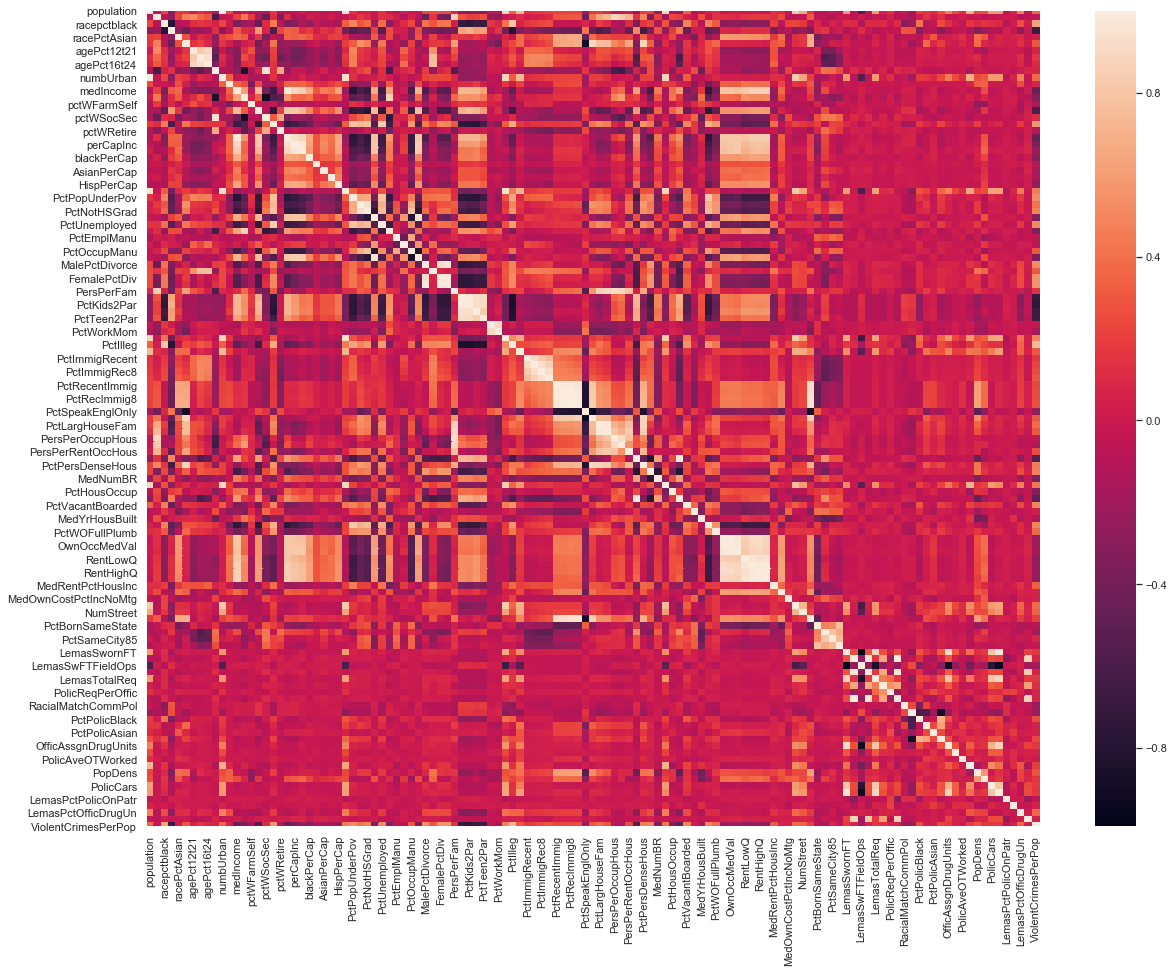

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

row_droplabel_data = row_file_df.drop(['ViolentCrimesPerPop'], axis=1)

row_file_data_correlation_matrix = row_file_df.corr()
fig = plt.figure(figsize=(20, 15))
sns.heatmap(row_file_data_correlation_matrix)
plt.show()


1_d

In [10]:
all_feature_name = row_file_df.columns.values.tolist()
cv_dict = {}
for i in all_feature_name:
    target = np.array(row_file_df[i])
    s = np.std(target)
    m = np.mean(target)
    CV = s/m
    cv_dict[i] = CV
print(cv_dict)


{'population': 2.20294993386533, 'householdsize': 0.3532097004119048, 'racepctblack': 1.4105665605340265, 'racePctWhite': 0.3237003633601353, 'racePctAsian': 1.3588213380942629, 'racePctHisp': 1.6138729571484036, 'agePct12t21': 0.36574812216270847, 'agePct12t29': 0.2906199873800477, 'agePct16t24': 0.4950363361780536, 'agePct65up': 0.4233355166105009, 'numbUrban': 2.0012416335137146, 'pctUrban': 0.6386886583257786, 'medIncome': 0.5796080008727312, 'pctWWage': 0.32762787426405326, 'pctWFarmSelf': 0.6998545594658827, 'pctWInvInc': 0.3591498556991753, 'pctWSocSec': 0.3684202133633635, 'pctWPubAsst': 0.6988551987450082, 'pctWRetire': 0.3495513990736716, 'medFamInc': 0.5275995387856797, 'perCapInc': 0.5454965924474838, 'whitePerCap': 0.5074249049035463, 'blackPerCap': 0.5893211744649158, 'indianPerCap': 0.8094820310422648, 'AsianPerCap': 0.6060418273404315, 'OtherPerCap': 0.6704763858174291, 'HispPerCap': 0.4738408572341724, 'NumUnderPov': 2.304391666011815, 'PctPopUnderPov': 0.7537910884956

1_e

['NumStreet', 'NumInShelters', 'NumIlleg', 'NumImmig', 'LemasPctOfficDrugUn', 'NumUnderPov', 'population', 'numbUrban', 'HousVacant', 'LandArea', 'racePctHisp']


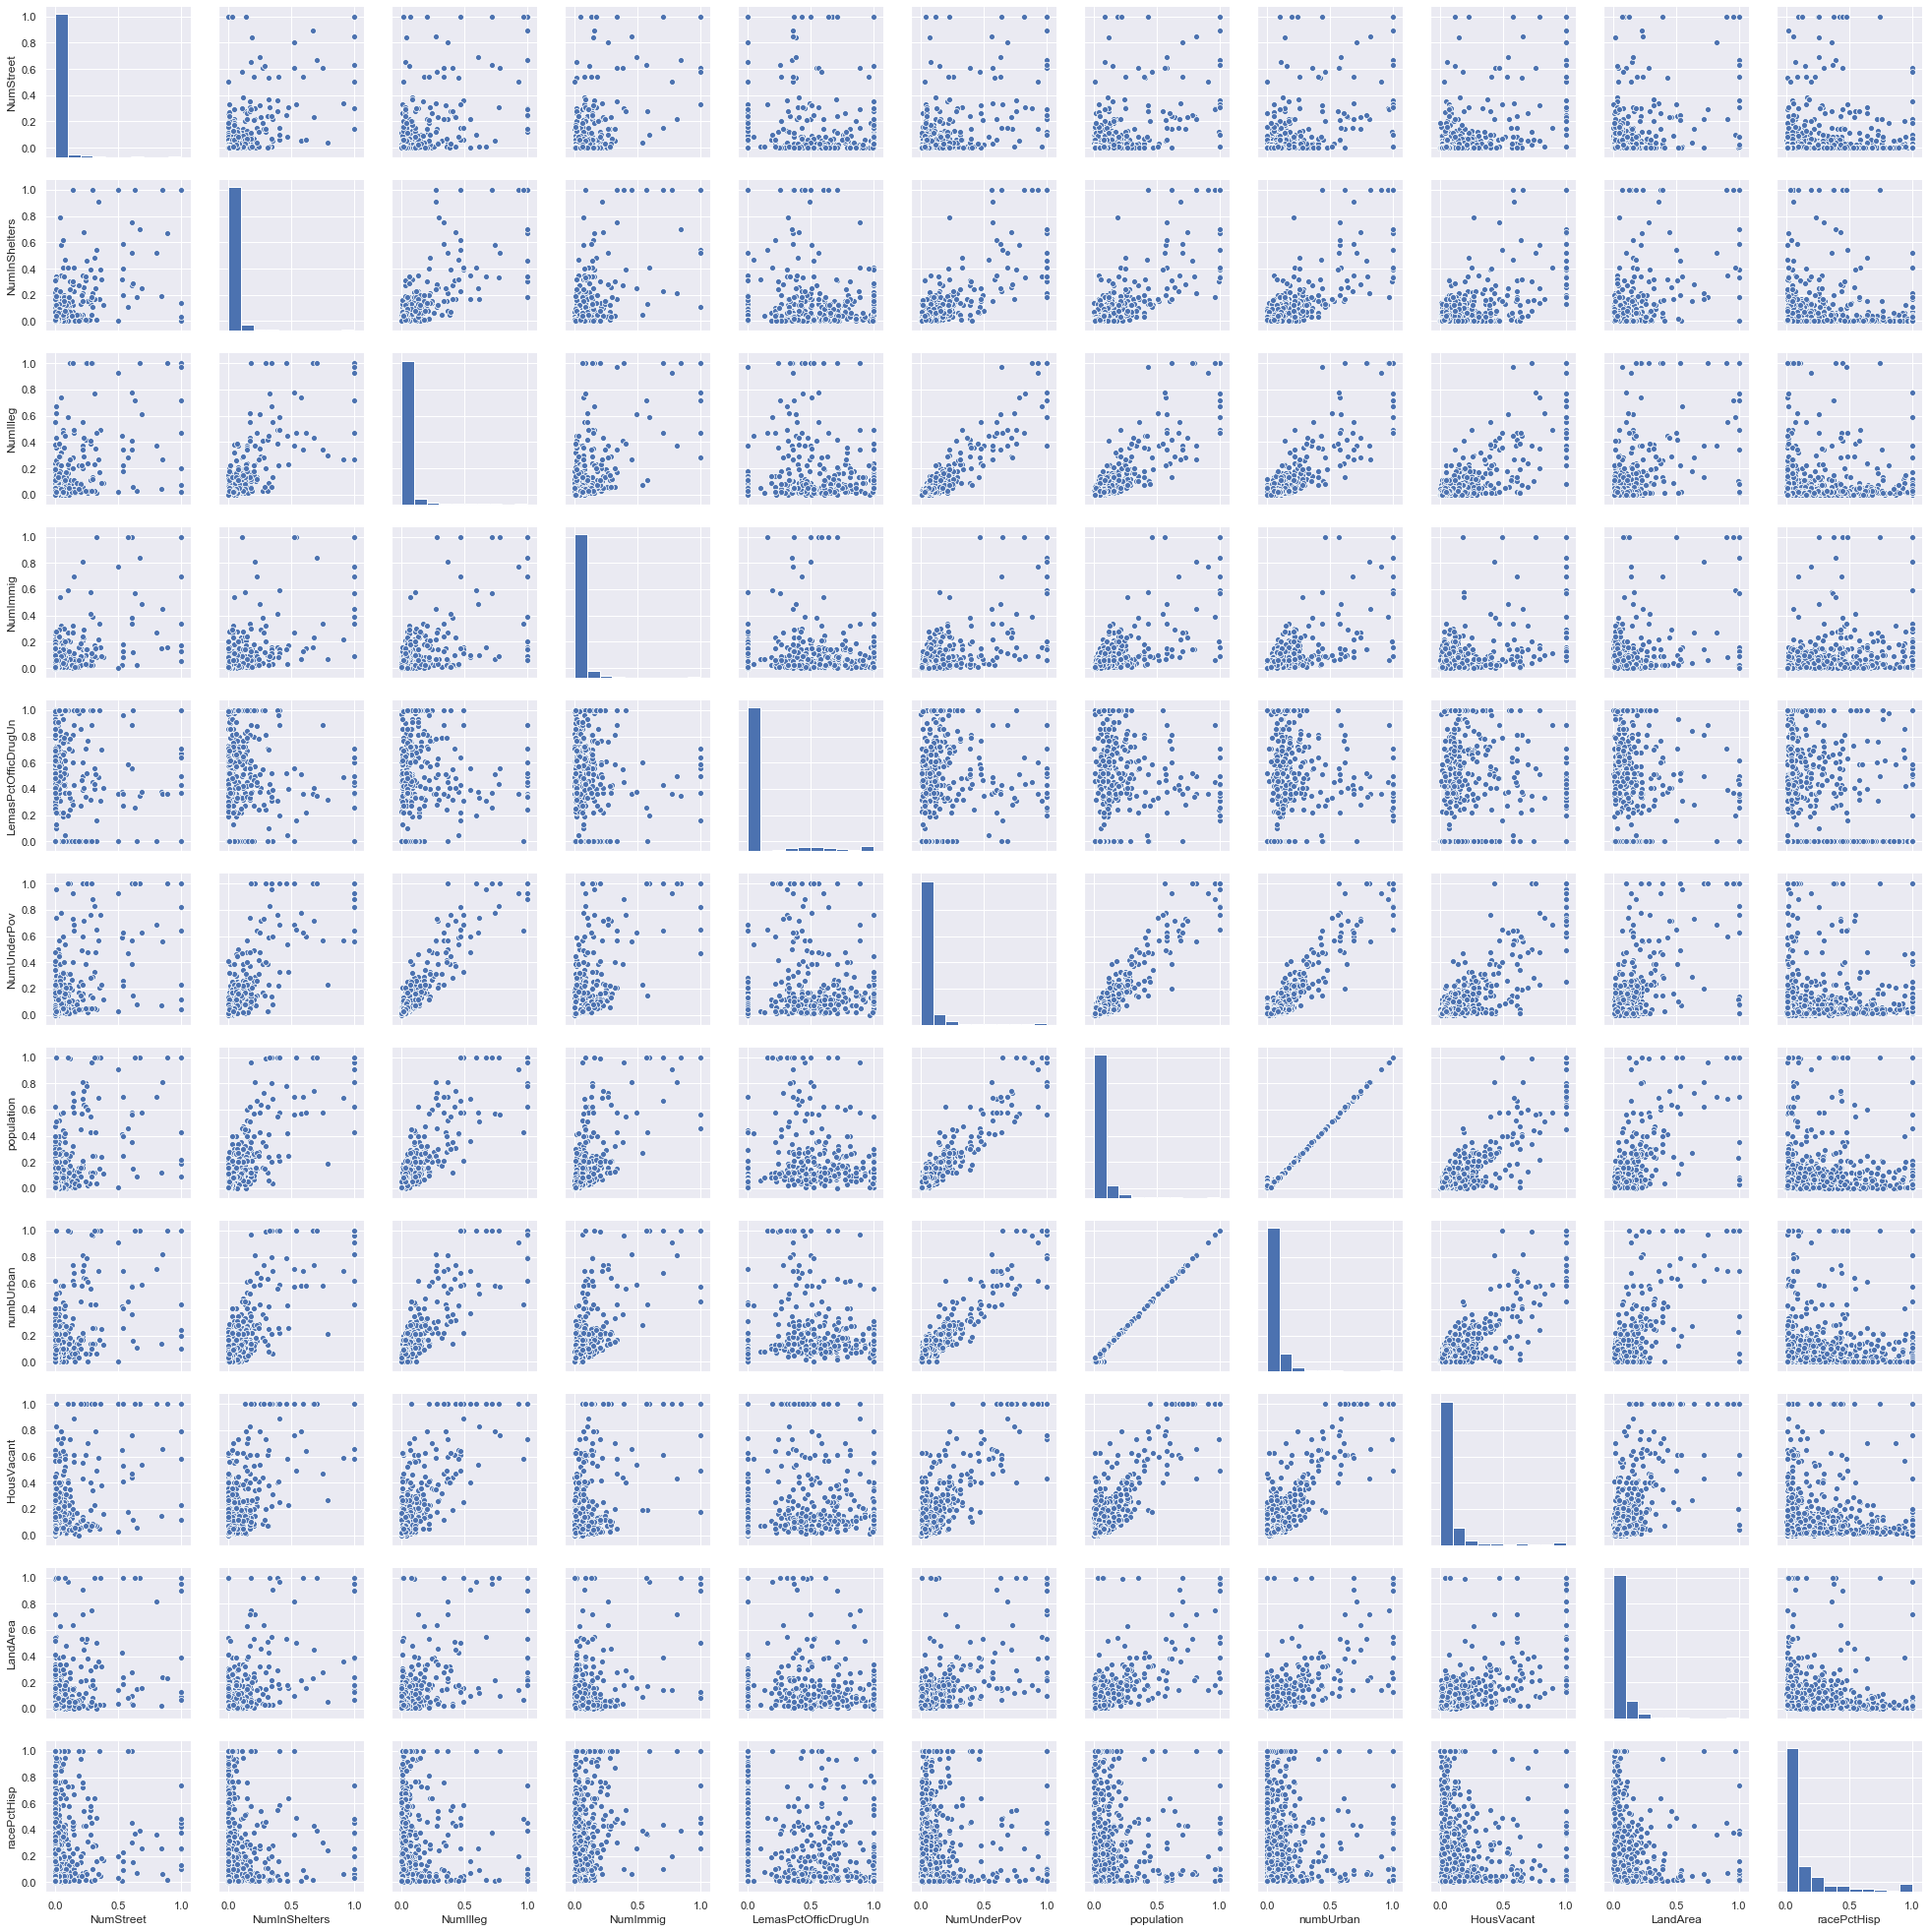

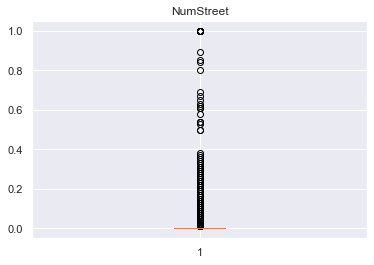

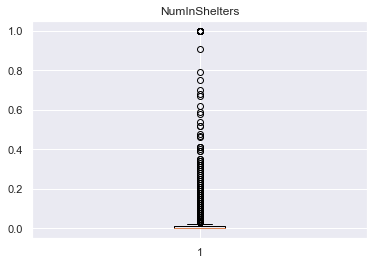

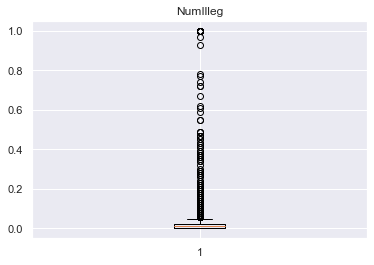

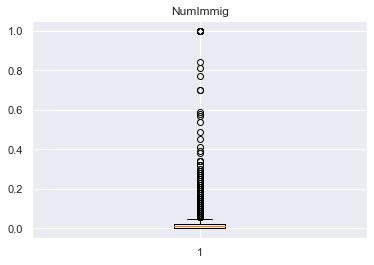

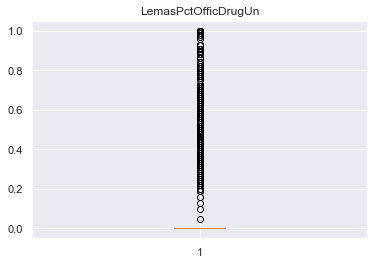

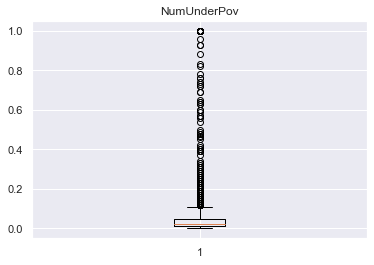

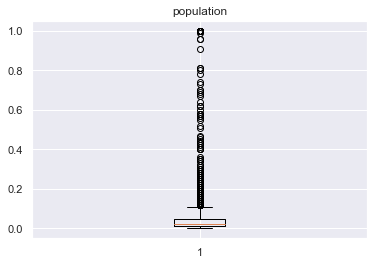

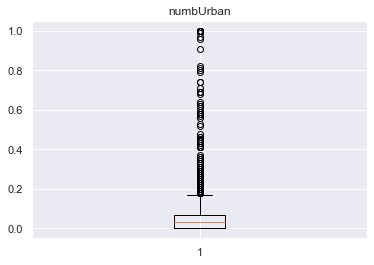

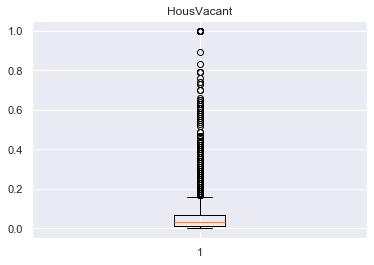

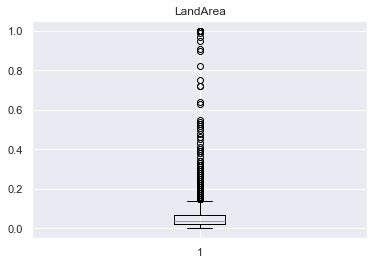

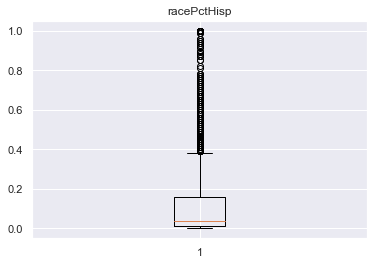

In [39]:
import seaborn as sns

feature_number = int(np.sqrt(128))

highest_CV = sorted(cv_dict.items(), key=lambda item:item[1], reverse=True)

highest_CV = highest_CV[:feature_number]

highest_CV_name = []
for i in range(0,len(highest_CV)):
    a = highest_CV[i][0]
    highest_CV_name.append(a)
print(highest_CV_name)
picture_data = row_droplabel_data[highest_CV_name]

sns.set()

sns.pairplot(data=picture_data)
plt.show()
for i in highest_CV_name:
    plt.boxplot(x=row_droplabel_data[i])
    plt.title(i)
# plt.boxplot(data=)
    plt.show()

1_f

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X_train = traindata_df.drop(['ViolentCrimesPerPop'], axis=1)

y_train = traindata_df['ViolentCrimesPerPop']

X_test = testdata_df.drop(['ViolentCrimesPerPop'], axis=1)

y_test = testdata_df['ViolentCrimesPerPop']


model_f = LinearRegression()
model_f.fit(X_train,y_train)

predict_test = model_f.predict(X_test)
MSE = mean_squared_error(y_test,predict_test)
print('MSE is: ',MSE)




MSE is:  6.194851944409198e+18


1_g

In [13]:
from sklearn.linear_model import RidgeCV
model_g = RidgeCV(alphas=[0.1, 1.0, 10.0],cv=5)
model_g.fit(X_train,y_train)
predict_test = model_g.predict(X_test)
MSE = mean_squared_error(y_test,predict_test)
print('MSE is: ',MSE)


MSE is:  0.017723737122827796


1_h

In [14]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LassoCV
from sklearn.feature_selection import SelectFromModel
from sklearn import preprocessing

model_h = LassoCV(cv=5)
model_h.fit(X_train,y_train)
predict_test = model_h.predict(X_test)
MSE = mean_squared_error(y_test,predict_test)

variable_coef = model_h.coef_.tolist()
variable_name = X_train.columns.tolist()
variable = []

for i in range(0,len(variable_name)):
    if variable_coef[i]!=0:
        variable.append(variable_name[i])

print(variable)
print(' ')
print('For original')
#print('C is:',model_h.alpha_)
print('MSE IS:',MSE)
print(' ')



'''standardized data'''
# X_train_standardized = np.array(X_train)

# X_train_standardized_1 = preprocessing.StandardScaler().fit_transform(X_train)
# #X_train_standardied = preprocessing.scale(X_train_standardied)

# X_test_standardized = np.array(X_test)

# X_test_standardized = preprocessing.StandardScaler().fit(X_test_standardied)
# #X_train_standardied = preprocessing.scale(X_train_standardied)




X_train_standardized = preprocessing.StandardScaler().fit_transform(X_train)

X_test_standardized = preprocessing.StandardScaler().fit_transform(X_test)


model_h = LassoCV(cv=5,normalize=False)
model_h.fit(X_train_standardized,y_train)
predict_test = model_h.predict(X_test_standardized)
MSE = mean_squared_error(y_test,predict_test)
print('For standardized')
print('MSE is:',MSE)


['racepctblack', 'racePctAsian', 'agePct12t21', 'agePct12t29', 'pctUrban', 'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst', 'pctWRetire', 'whitePerCap', 'blackPerCap', 'indianPerCap', 'AsianPerCap', 'OtherPerCap', 'HispPerCap', 'PctPopUnderPov', 'PctLess9thGrade', 'PctEmploy', 'PctEmplManu', 'PctOccupManu', 'MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv', 'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMom', 'NumIlleg', 'PctIlleg', 'NumImmig', 'PctImmigRec10', 'PctRecImmig10', 'PctNotSpeakEnglWell', 'PctLargHouseOccup', 'PersPerOccupHous', 'PctPersOwnOccup', 'PctPersDenseHous', 'PctHousLess3BR', 'MedNumBR', 'HousVacant', 'PctHousOccup', 'PctVacantBoarded', 'PctVacMore6Mos', 'MedYrHousBuilt', 'PctHousNoPhone', 'PctWOFullPlumb', 'OwnOccLowQuart', 'RentLowQ', 'MedRent', 'MedRentPctHousInc', 'MedOwnCostPctInc', 'MedOwnCostPctIncNoMtg', 'NumInShelters', 'NumStreet', 'PctForeignBorn', 'PctBornSameState', 'PctSameCity85', 'LemasSwFTFieldPerPop', 'LemasTotalR

best M is: 96


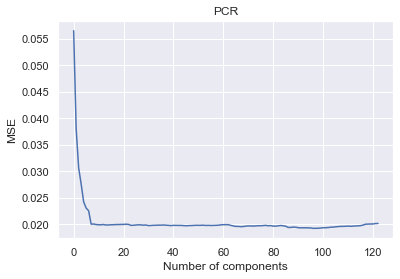

In [40]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn import model_selection
from sklearn.linear_model import LinearRegression



X_train = traindata_df.drop(['ViolentCrimesPerPop'], axis=1)
y_train = traindata_df['ViolentCrimesPerPop']
X_test = testdata_df.drop(['ViolentCrimesPerPop'], axis=1)
y_test = testdata_df['ViolentCrimesPerPop']

'''http://www.science.smith.edu/~jcrouser/SDS293/labs/lab11-py.html'''

pca = PCA()
Linear = LinearRegression()
MSE_PCR = []
N = [0]

n = len(X_train.columns)
m = len(X_train)
#scale all data
#X_train_reduce = pca.fit_transform(scale(X_train))
X_train_reduce = pca.fit_transform(X_train)
#X_test_reduce = pca.fit_transform(scale(X_test))
X_test_reduce = pca.fit_transform(X_test)
#intercept
CV_10 = model_selection.KFold(n_splits=10, shuffle=True, random_state=1)
score_1 = model_selection.cross_val_score(Linear, np.ones((m,n)), y_train,cv=CV_10, scoring='neg_mean_squared_error')
score = -1*(score_1.mean())
MSE_PCR.append(score)

# different components
for i in range(0,n):
    N.append(i+1)
    score_1 = model_selection.cross_val_score(Linear, X_train_reduce[:,:(i+1)], y_train,cv=CV_10, scoring='neg_mean_squared_error')
    score = -1*(score_1.mean())
    MSE_PCR.append(score)
# print(MSE_PCR)

plt.plot(N,MSE_PCR)
plt.xlabel('Number of components')
plt.ylabel('MSE')
plt.title('PCR')
MSE_PCR.remove(MSE_PCR[0])
N.remove(N[0])
M_index = MSE_PCR.index(min(MSE_PCR))
#print(M_index)
#print(min(MSE_PCR))
M = N[M_index]
print('best M is:',M)



In [41]:
X_test_reduce = X_test_reduce[:,:97]
Linear.fit(X_train_reduce[:,:97], y_train)
predict_test_reduce = Linear.predict(X_test_reduce[:,:97])
MSE = mean_squared_error(y_test, predict_test_reduce)
print('MSE is: ',MSE)

MSE is:  0.028118771733928537


1_j

In [1]:
import xgboost as xgb
import numpy as np
import pandas as pd

# get all name
row_name = pd.read_csv('/Users/liyifan/Desktop/551552/homework/homework4/Homework/communities_name.csv')
all_name = np.array(row_name)
need_name = all_name[74:202,0]
for i in range(0,len(need_name)):
    a = str(need_name[i]).split(' ')
    need_name[i] = a[1] 

row_file = pd.read_csv('/Users/liyifan/Desktop/551552/homework/homework4/Homework/communities_data1.csv',names=need_name)
all_file = np.array(row_file)

traindata = all_file[:1495,:]
testdata = all_file[1495:,:]


# for i in range(0,len(need_name)):
#     a = str(need_name[i]).split(' ')
#     need_name[i] = a[1]    
#print(need_name)

traindata_df = pd.DataFrame(data=traindata,columns=need_name)
testdata_df = pd.DataFrame(data=testdata,columns=need_name)

from sklearn.preprocessing import Imputer


'''train'''
traindata_df = pd.DataFrame(data=traindata,columns=need_name)
testdata_df = pd.DataFrame(data=testdata,columns=need_name)
#drop nonpredict predictor
traindata_df.drop(['state','county','community','communityname','fold'], inplace = True, axis=1)
traindata_df.replace(to_replace='?', value=np.nan, inplace=True)
#traindata_df.dropna(how='all',axis=1)
useful_name = traindata_df.columns.values.tolist()

imp_mean = Imputer(missing_values=np.nan, strategy='mean')
useful_traindata = imp_mean.fit_transform(traindata_df)

traindata_df = pd.DataFrame(useful_traindata, columns=useful_name)

'''test'''
testdata_df.drop(['state','county','community','communityname','fold'], inplace = True, axis=1)
testdata_df.replace(to_replace='?', value=np.nan, inplace=True)
#traindata_df.dropna(how='all',axis=1)
useful_name = testdata_df.columns.values.tolist()

imp_mean = Imputer(missing_values=np.nan, strategy='mean')
useful_testdata = imp_mean.fit_transform(testdata_df)

testdata_df = pd.DataFrame(useful_testdata, columns=useful_name)







X_train = traindata_df.drop(['ViolentCrimesPerPop'], axis=1)

y_train = traindata_df['ViolentCrimesPerPop']

X_test = testdata_df.drop(['ViolentCrimesPerPop'], axis=1)

y_test = testdata_df['ViolentCrimesPerPop']





X_train_xg = np.array(X_train)
y_train_xg = np.array(y_train)
xgtrain = xgb.DMatrix(X_train_xg,label=y_train_xg)

result_list = []
number_of_alpha = [0.001,0.01,0.1,1,10,100,1000]
for i in number_of_alpha:
    params = {
        'booster': 'gbtree',
        'objective': 'reg:linear',
        'eval_metric':'rmse',
        'max_depth': 6,
        'alpha': i,
        'subsample': 1,
        'colsample_bytree': 0.7,
        'min_child_weight': 3,
        'silent': 1,
        'eta': 0.1,
        'seed': 1000
    }
    result_row = xgb.cv(params=params, dtrain=xgtrain, num_boost_round=50, nfold=5, metrics='rmse', early_stopping_rounds=10, seed=123)
    result = min(np.array(result_row['train-rmse-mean']))
    result_list.append(result)

idx = result_list.index(min(result_list))
best_alpha_number = number_of_alpha[idx]
print('best α is: ',best_alpha_number)


best α is:  0.001


In [2]:
from sklearn.metrics import mean_squared_error

X_test_xg = np.array(X_test)
y_test_xg = np.array(y_test)


xg_model = xgb.XGBRegressor(booster='gbtree',
        objective='reg:linear',
        eval_metric='rmse',
        max_depth= 6,
        alpha= best_alpha_number,
        subsample=1,
        colsample_bytree=0.7,
        min_child_weight=3,
        silent=1,
        eta=0.1,
        seed=1000)

xg_model.fit(X_train_xg,y_train_xg)
y_predict = xg_model.predict(X_test_xg)
mse = mean_squared_error(y_predict,y_test_xg)
print('mse is :',mse)





mse is : 0.016205516371611398


2  Tree Based Methods

2_bi

In [17]:
row_traindata = pd.read_csv('/Users/liyifan/Desktop/551552/homework/homework4/Homework/aps_failure_training_set.csv')
all_train_name = row_traindata.columns.values.tolist()

row_traindata.replace(to_replace='na', value=np.nan, inplace=True)
#get data of column class
class_drop_train = row_traindata['class']
row_traindata.drop(['class'], inplace = True, axis=1)
row_traindata = np.array(row_traindata)

#deal with missing data
imp_mean = Imputer(missing_values=np.nan, strategy='mean')
row_traindata = imp_mean.fit_transform(row_traindata)

traindata = pd.DataFrame(row_traindata,columns=all_train_name[1:])
#add class back
#traindata.insert(0,'class', class_drop_train)
traindata




#traindata_df.replace(to_replace='?', value=np.nan, inplace=True)

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,76698.0,0.713189,2.130706e+09,280.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,33058.0,0.713189,0.000000e+00,190620.639314,0.0,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,41040.0,0.713189,2.280000e+02,100.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,12.0,0.000000,7.000000e+01,66.000000,0.0,10.0,0.0,0.0,0.0,318.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,60874.0,0.713189,1.368000e+03,458.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,153002.0,0.713189,6.640000e+02,186.000000,0.0,0.0,0.0,0.0,0.0,2564.0,...,998500.0,566884.0,1290398.0,1218244.0,1019768.0,717762.0,898642.0,28588.0,0.0,0.0
59996,2286.0,0.713189,2.130707e+09,224.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,10578.0,6760.0,21126.0,68424.0,136.0,0.0,0.0,0.0,0.0,0.0
59997,112.0,0.000000,2.130706e+09,18.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,792.0,386.0,452.0,144.0,146.0,2622.0,0.0,0.0,0.0,0.0
59998,80292.0,0.713189,2.130706e+09,494.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,699352.0,222654.0,347378.0,225724.0,194440.0,165070.0,802280.0,388422.0,0.0,0.0


In [18]:
row_testdata = pd.read_csv('/Users/liyifan/Desktop/551552/homework/homework4/Homework/aps_failure_test_set.csv')
all_test_name = row_testdata.columns.values.tolist()

row_testdata.replace(to_replace='na', value=np.nan, inplace=True)
#get data of column class
class_drop_test = row_testdata['class']
row_testdata.drop(['class'], inplace = True, axis=1)
row_testdata = np.array(row_testdata)
#deal with missing data
imp_mean = Imputer(missing_values=np.nan, strategy='mean')
row_testdata = imp_mean.fit_transform(row_testdata)

testdata = pd.DataFrame(row_testdata,columns=all_test_name[1:])
#testdata.insert(0,'class', class_drop_test)
testdata

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,60.0,0.000000,2.000000e+01,12.0,0.0,0.0,0.0,0.0,0.0,2682.0,...,1098.0,138.0,412.0,654.0,78.0,88.0,0.0,0.0,0.0,0.0
1,82.0,0.000000,6.800000e+01,40.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1068.0,276.0,1620.0,116.0,86.0,462.0,0.0,0.0,0.0,0.0
2,66002.0,2.000000,2.120000e+02,112.0,0.0,0.0,0.0,0.0,0.0,199486.0,...,495076.0,380368.0,440134.0,269556.0,1315022.0,153680.0,516.0,0.0,0.0,0.0
3,59816.0,0.772065,1.010000e+03,936.0,0.0,0.0,0.0,0.0,0.0,0.0,...,540820.0,243270.0,483302.0,485332.0,431376.0,210074.0,281662.0,3232.0,0.0,0.0
4,1814.0,0.772065,1.560000e+02,140.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7646.0,4144.0,18466.0,49782.0,3176.0,482.0,76.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,81852.0,0.772065,2.130706e+09,892.0,0.0,0.0,0.0,0.0,0.0,0.0,...,632658.0,273242.0,510354.0,373918.0,349840.0,317840.0,960024.0,25566.0,0.0,0.0
15996,18.0,0.000000,5.200000e+01,46.0,8.0,26.0,0.0,0.0,0.0,0.0,...,266.0,44.0,46.0,14.0,2.0,0.0,0.0,0.0,0.0,0.0
15997,79636.0,0.772065,1.670000e+03,1518.0,0.0,0.0,0.0,0.0,0.0,0.0,...,806832.0,449962.0,778826.0,581558.0,375498.0,222866.0,358934.0,19548.0,0.0,0.0
15998,110.0,0.772065,3.600000e+01,32.0,0.0,0.0,0.0,0.0,0.0,0.0,...,588.0,210.0,180.0,544.0,1004.0,1338.0,74.0,0.0,0.0,0.0


2_bii

In [19]:
traindata_name = traindata.columns.values.tolist()
traindata_cv_dict = {}
for i in traindata_name:
    target = np.array(traindata[i])
    s = np.std(target)
    m = np.mean(target)
    CV = s/m
    traindata_cv_dict[i] = CV
print(traindata_cv_dict)

{'aa_000': 2.4509171533790517, 'ab_000': 2.3283805836167146, 'ac_000': 2.169748441813564, 'ad_000': 183.84608829915004, 'ae_000': 23.190743406979212, 'af_000': 18.658765604354603, 'ag_000': 91.87779897140425, 'ag_001': 34.85465961859649, 'ag_002': 17.368998661426197, 'ag_003': 8.549977776004786, 'ag_004': 5.401433682911924, 'ag_005': 2.927067689890113, 'ag_006': 2.3449075291972994, 'ag_007': 2.8334604784703683, 'ag_008': 6.154531790146825, 'ag_009': 32.984076170627695, 'ah_000': 2.3001680803074196, 'ai_000': 18.01253163814935, 'aj_000': 43.801457366003206, 'ak_000': 74.52606690035718, 'al_000': 9.074295202583206, 'am_0': 9.058596116870612, 'an_000': 2.238778117662759, 'ao_000': 2.2601302821582228, 'ap_000': 3.0591388134967668, 'aq_000': 2.839588029836096, 'ar_000': 10.836959393077509, 'as_000': 86.41618369660345, 'at_000': 23.45922929480274, 'au_000': 68.15998600571068, 'av_000': 5.778736753345787, 'ax_000': 3.8775360254409215, 'ay_000': 37.009253912764585, 'ay_001': 52.23341647963621,

2_biii

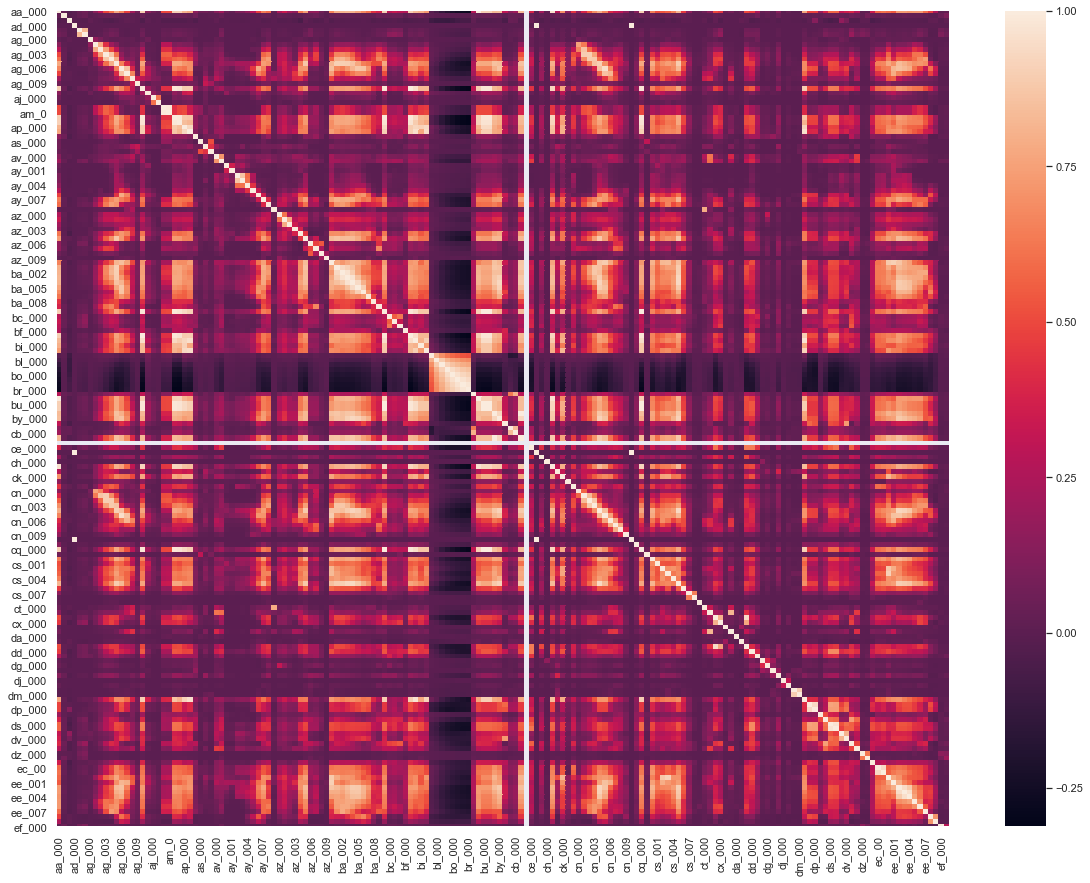

In [25]:
traindata_correlation_matrix = traindata.corr()
fig = plt.figure(figsize=(20, 15))
sns.heatmap(traindata_correlation_matrix)
plt.show()


2_biv

['cs_009', 'cf_000', 'co_000', 'ad_000', 'dh_000', 'dj_000', 'ag_000', 'as_000', 'ay_009', 'az_009', 'ak_000', 'au_000', 'ch_000']


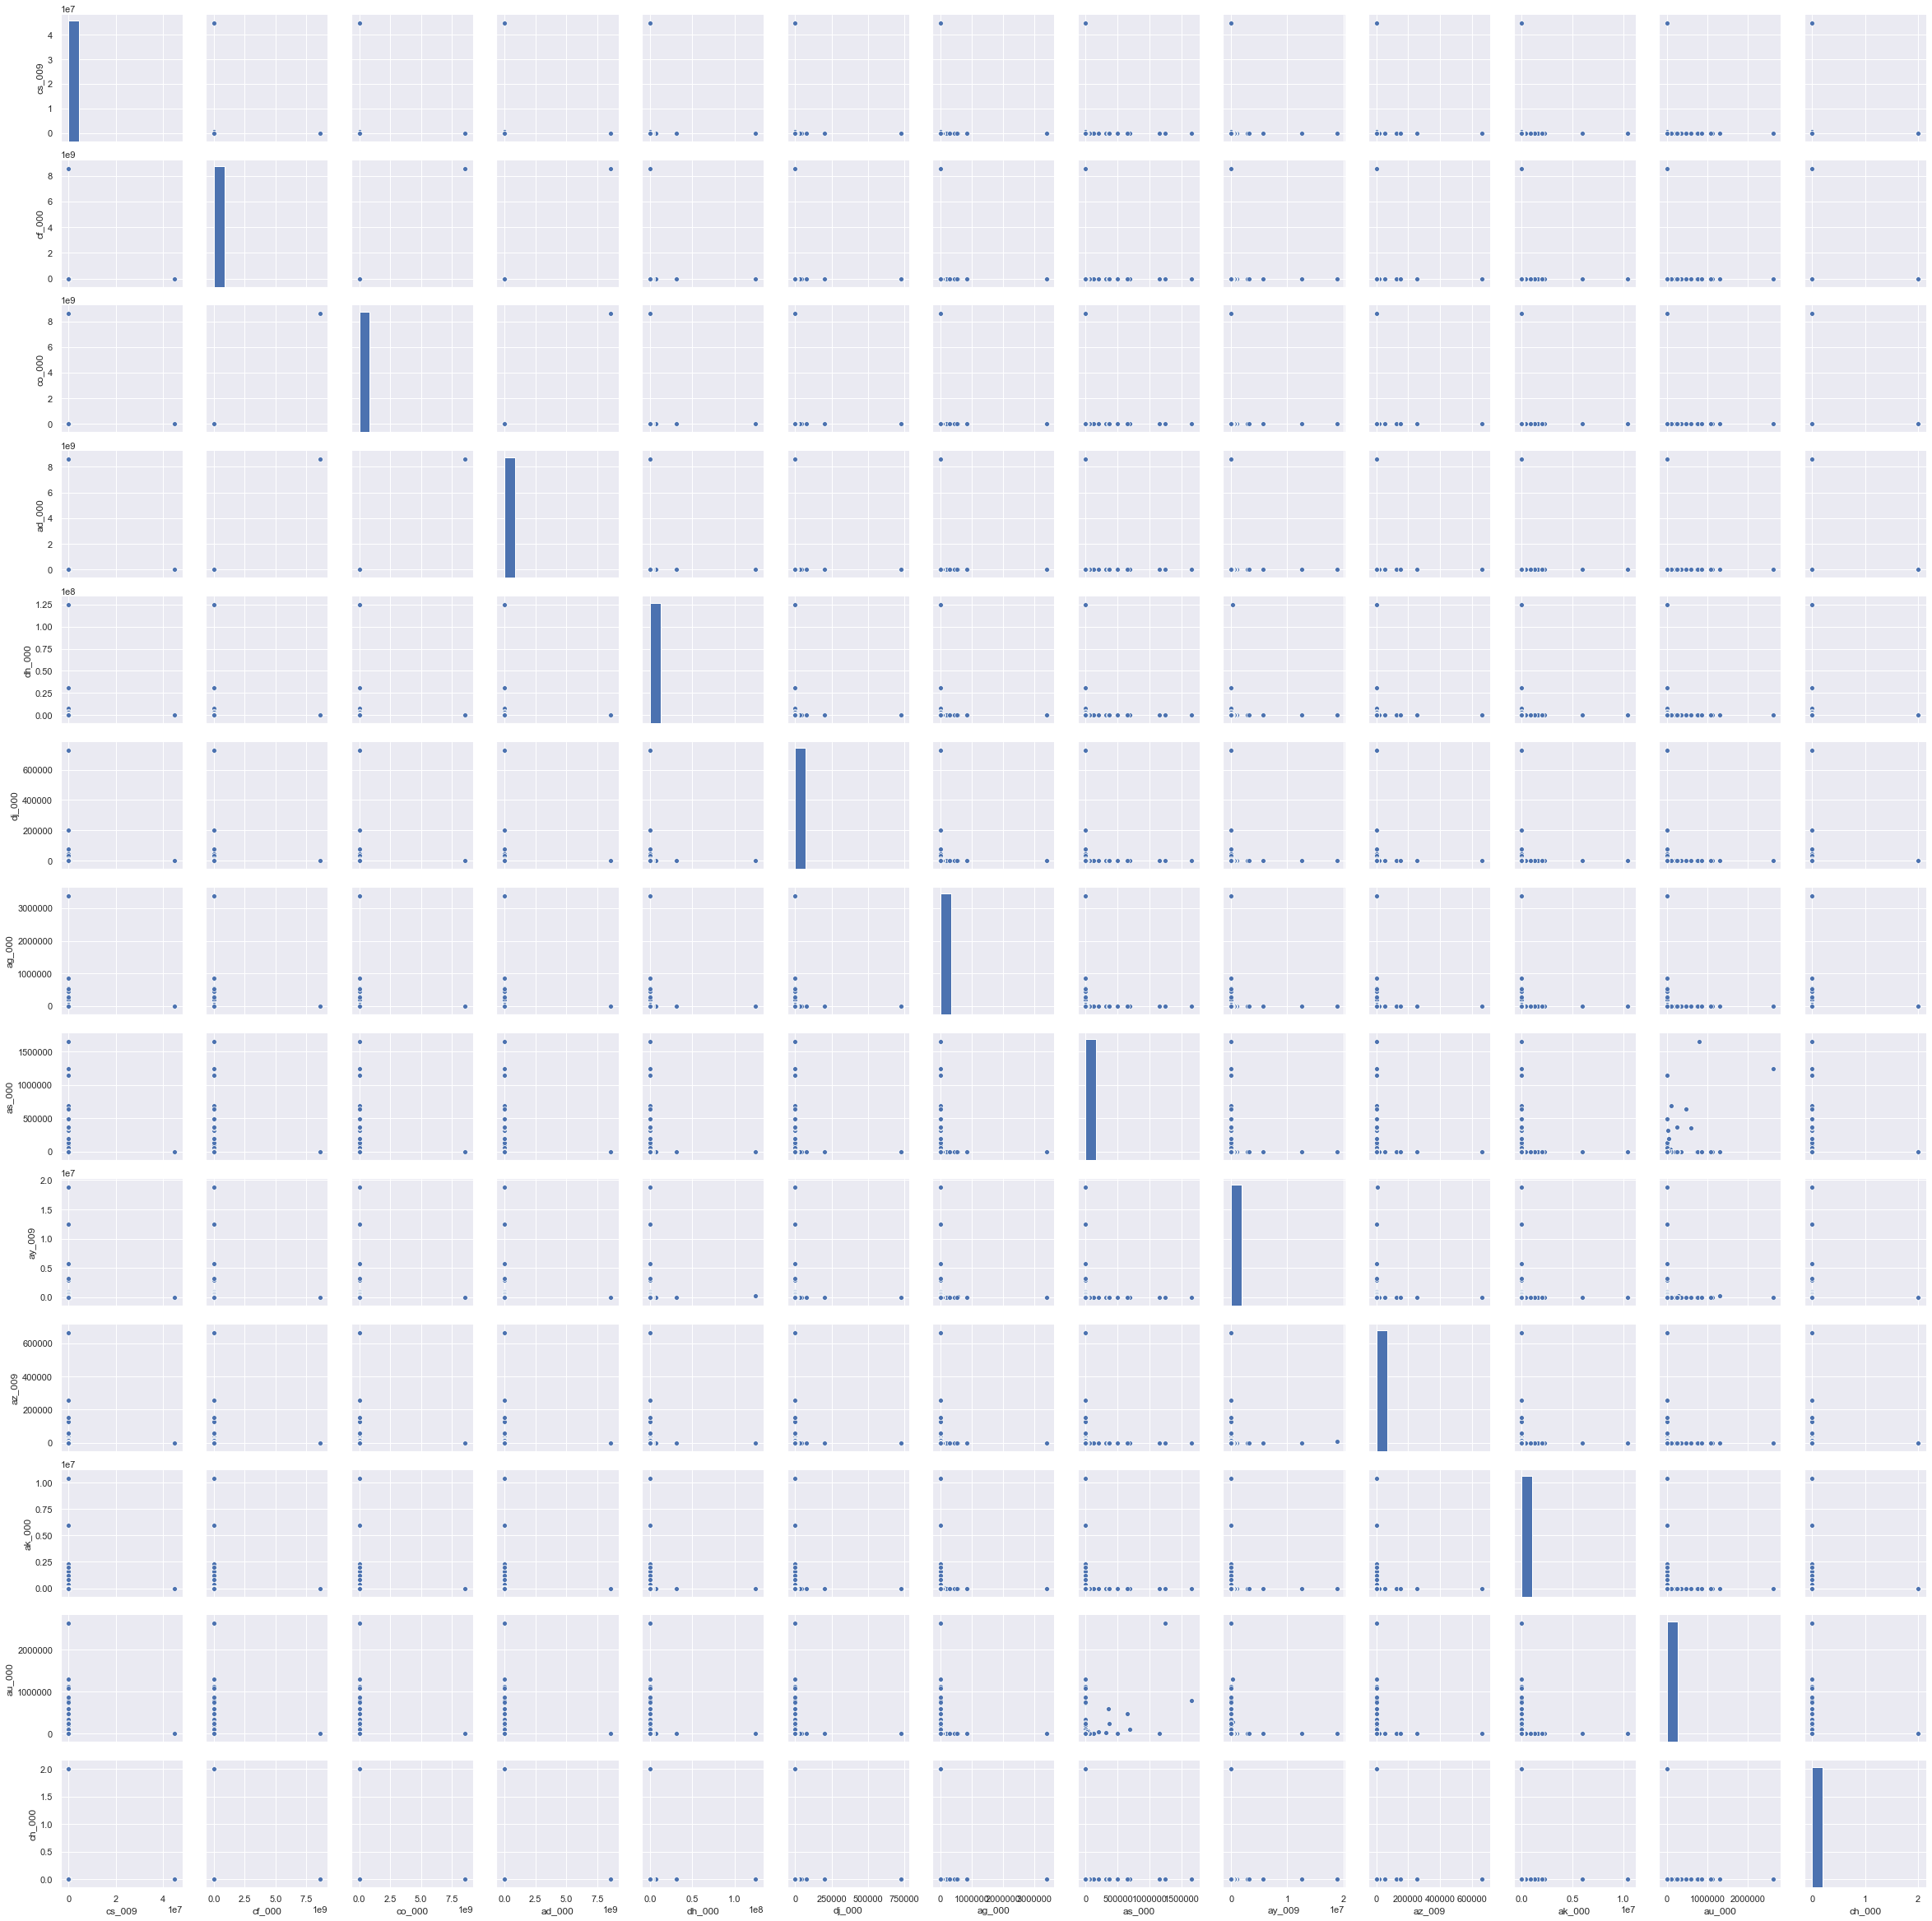

In [26]:
feature_number = int(np.sqrt(170))

highest_CV = sorted(traindata_cv_dict.items(), key=lambda item:item[1], reverse=True)

highest_CV = highest_CV[:feature_number]

highest_CV_name = []
for i in range(0,len(highest_CV)):
    a = highest_CV[i][0]
    highest_CV_name.append(a)
print(highest_CV_name)
picture_data = traindata[highest_CV_name]


sns.set()
sns.pairplot(data=picture_data)
plt.show()

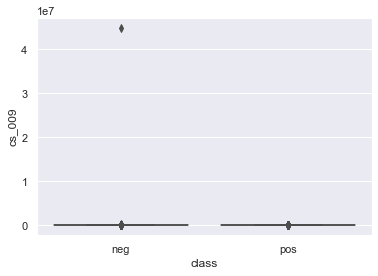

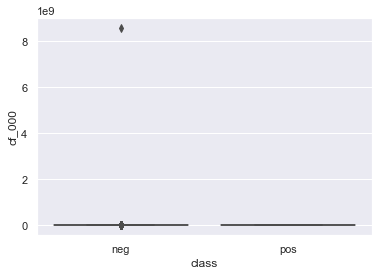

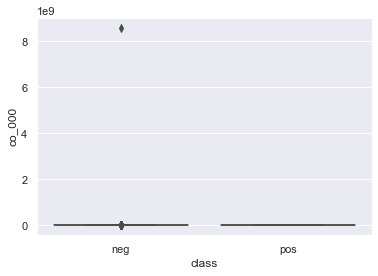

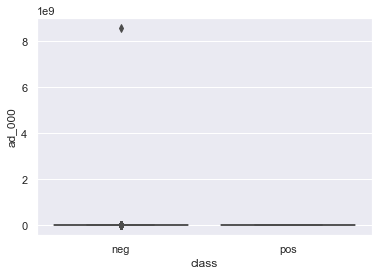

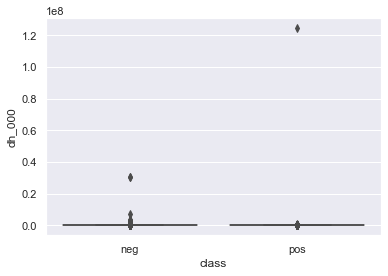

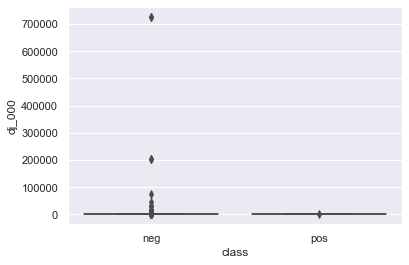

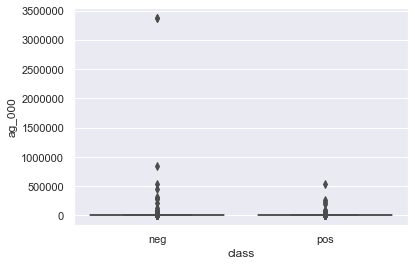

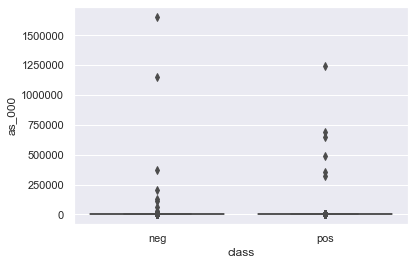

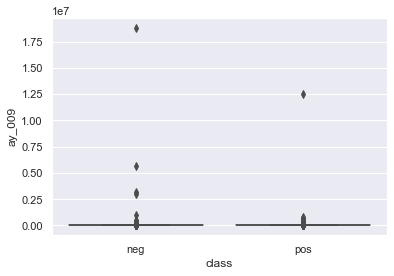

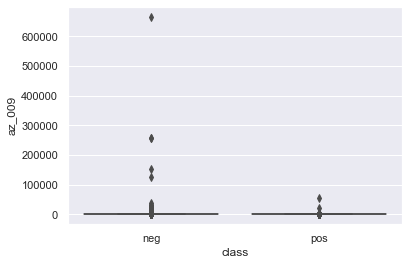

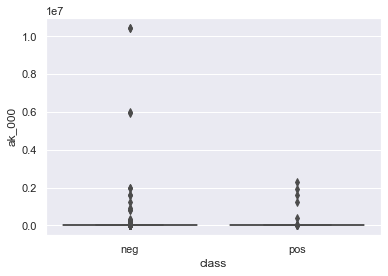

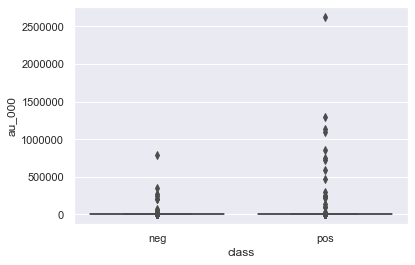

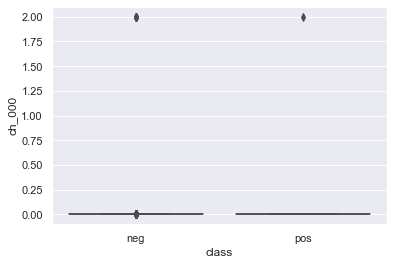

In [38]:
row_2_traindata = traindata
row_2_traindata.insert(0,'class',class_drop_train)


box_feature = ['cs_009', 'cf_000', 'co_000', 'ad_000', 'dh_000', 'dj_000', 'ag_000', 'as_000', 'ay_009', 'az_009', 'ak_000', 'au_000', 'ch_000']
for i in box_feature:
    sns.boxplot(data=row_2_traindata,x='class',y=i)
    plt.show()



2_bv

In [19]:

neg = 0
pos = 0
for i in class_drop_train:
    if i=='neg':
        neg+=1
    else:
        pos+=1
print('number of neg:',neg)
print('number of pos',pos)
print('so the data set is imbalanced')

number of neg: 59000
number of pos 1000
so the data set is imbalanced


c

[[59000     0]
 [   43   957]]
 
 
AUC is : 0.9784999999999999


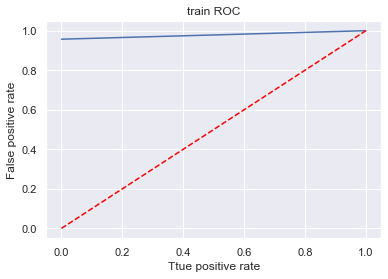

[[15604    21]
 [  133   242]]
 
 
AUC is : 0.8219946666666667


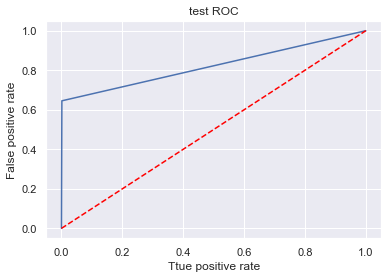

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

y_train=np.array([1 if i == 'pos' else 0 for i in class_drop_train])
y_test=np.array([1 if i == 'pos' else 0 for i in class_drop_test])



'''train'''
rfr_1 = RandomForestClassifier()
rfr_1.fit(traindata,y_train)
predict_train = rfr_1.predict(traindata)
matrix_report = confusion_matrix(y_train, predict_train)
print(matrix_report)

fpr,tpr,thresholds = roc_curve(y_train,predict_train)

print(' ')
print(' ')
ROCAUC = auc(fpr,tpr)
print('AUC is :', ROCAUC)
plt.title('train ROC')
plt.xlabel('Ttue positive rate')
plt.ylabel('False positive rate')
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'--',color = 'red')
plt.show()



'''test'''
rfr_2 = RandomForestClassifier()
rfr_2.fit(traindata,y_train)
predict_test = rfr_2.predict(testdata)
matrix_report = confusion_matrix(y_test, predict_test)
print(matrix_report)

fpr,tpr,thresholds = roc_curve(y_test,predict_test)

print(' ')
print(' ')
ROCAUC = auc(fpr,tpr)
print('AUC is :', ROCAUC)
plt.title('test ROC')
plt.xlabel('Ttue positive rate')
plt.ylabel('False positive rate')
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'--',color = 'red')
plt.show()



d

[[59000     0]
 [   45   955]]
 
 
AUC is : 0.9775


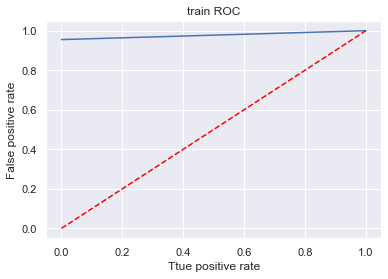

[[15607    18]
 [  190   185]]
 
 
AUC is : 0.7460906666666667


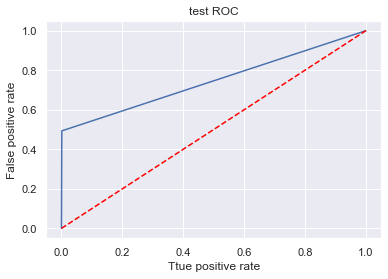

In [21]:


'''train'''
rfr1 = RandomForestClassifier(class_weight='balanced')
rfr1.fit(traindata,y_train)
predict_train = rfr1.predict(traindata)
matrix_report = confusion_matrix(y_train, predict_train)
print(matrix_report)

fpr,tpr,thresholds = roc_curve(y_train,predict_train)

print(' ')
print(' ')
ROCAUC = auc(fpr,tpr)
print('AUC is :', ROCAUC)
plt.title('train ROC')
plt.xlabel('Ttue positive rate')
plt.ylabel('False positive rate')
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'--',color = 'red')
plt.show()



'''test'''
rfr2 = RandomForestClassifier(class_weight='balanced')
rfr2.fit(traindata,y_train)
predict_test = rfr2.predict(testdata)
matrix_report = confusion_matrix(y_test, predict_test)
print(matrix_report)

fpr,tpr,thresholds = roc_curve(y_test,predict_test)

print(' ')
print(' ')
ROCAUC = auc(fpr,tpr)
print('AUC is :', ROCAUC)
plt.title('test ROC')
plt.xlabel('Ttue positive rate')
plt.ylabel('False positive rate')
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'--',color = 'red')
plt.show()


e

In [64]:

from weka.classifiers import Classifier
import weka.core.jvm as jvm

jvm.stop()
jvm.start()


traindata.insert(0,'class', class_drop_train)
testdata.insert(0,'class', class_drop_test)

DEBUG:weka.core.jvm:Adding bundled jars
DEBUG:weka.core.jvm:Classpath=['/Users/liyifan/anaconda3/lib/python3.7/site-packages/javabridge/jars/rhino-1.7R4.jar', '/Users/liyifan/anaconda3/lib/python3.7/site-packages/javabridge/jars/runnablequeue.jar', '/Users/liyifan/anaconda3/lib/python3.7/site-packages/javabridge/jars/cpython.jar', '/Users/liyifan/anaconda3/lib/python3.7/site-packages/weka/lib/python-weka-wrapper.jar', '/Users/liyifan/anaconda3/lib/python3.7/site-packages/weka/lib/weka.jar', '/Users/liyifan/anaconda3/lib/python3.7/site-packages/weka/lib/python-weka-wrapper.jar', '/Users/liyifan/anaconda3/lib/python3.7/site-packages/weka/lib/weka.jar', '/Users/liyifan/anaconda3/lib/python3.7/site-packages/weka/lib/python-weka-wrapper.jar', '/Users/liyifan/anaconda3/lib/python3.7/site-packages/weka/lib/weka.jar', '/Users/liyifan/anaconda3/lib/python3.7/site-packages/weka/lib/python-weka-wrapper.jar', '/Users/liyifan/anaconda3/lib/python3.7/site-packages/weka/lib/weka.jar', '/Users/liyifan

In [29]:
import weka.core.converters as converters
from weka.classifiers import Evaluation
from weka.core.classes import Random
from sklearn.model_selection import StratifiedKFold

traindata.to_csv('/Users/liyifan/Desktop/551552/homework/homework4/Homework/weka_train_set.csv',index = False)
testdata.to_csv('/Users/liyifan/Desktop/551552/homework/homework4/Homework/weka_test_set.csv',index = False)

weka_traindata = converters.load_any_file("/Users/liyifan/Desktop/551552/homework/homework4/Homework/weka_train_set.csv")
weka_testdata = converters.load_any_file("/Users/liyifan/Desktop/551552/homework/homework4/Homework/weka_test_set.csv")

weka_traindata.class_is_first()
weka_testdata.class_is_first()


cls = Classifier(classname="weka.classifiers.trees.LMT")
eva = Evaluation(weka_traindata)
eva.crossvalidate_model(classifier=cls,data=weka_traindata, num_folds = 5, rnd=Random(2))


print(eva.percent_incorrect)


0.8283333333333334


the error is 0.828%

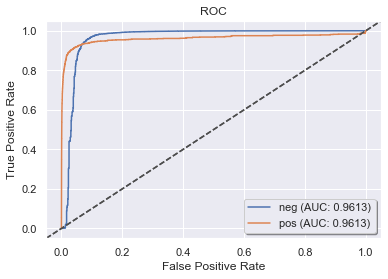

In [30]:
import weka.plot.classifiers as plcls
plcls.plot_roc(eva, class_index=[0, 1], wait=True)

In [31]:
train_matrix = eva.confusion_matrix
print(train_matrix)

[[58838.   162.]
 [  335.   665.]]


1.1875


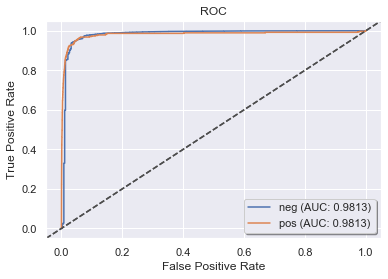

[[15562.    63.]
 [  127.   248.]]


In [32]:
cls1 = Classifier(classname="weka.classifiers.trees.LMT")
eva1 = Evaluation(weka_testdata)
eva1.crossvalidate_model(classifier=cls1,data=weka_testdata, num_folds = 5, rnd=Random(2))

print(eva1.percent_incorrect)
plcls.plot_roc(eva1, class_index=[0, 1], wait=True)
test_matrix = eva1.confusion_matrix
print(test_matrix)
jvm.stop()

the error is 1.1875%

f

DEBUG:weka.core.jvm:Adding bundled jars
DEBUG:weka.core.jvm:Classpath=['/Users/liyifan/anaconda3/lib/python3.7/site-packages/javabridge/jars/rhino-1.7R4.jar', '/Users/liyifan/anaconda3/lib/python3.7/site-packages/javabridge/jars/runnablequeue.jar', '/Users/liyifan/anaconda3/lib/python3.7/site-packages/javabridge/jars/cpython.jar', '/Users/liyifan/anaconda3/lib/python3.7/site-packages/weka/lib/python-weka-wrapper.jar', '/Users/liyifan/anaconda3/lib/python3.7/site-packages/weka/lib/weka.jar', '/Users/liyifan/anaconda3/lib/python3.7/site-packages/weka/lib/python-weka-wrapper.jar', '/Users/liyifan/anaconda3/lib/python3.7/site-packages/weka/lib/weka.jar', '/Users/liyifan/anaconda3/lib/python3.7/site-packages/weka/lib/python-weka-wrapper.jar', '/Users/liyifan/anaconda3/lib/python3.7/site-packages/weka/lib/weka.jar', '/Users/liyifan/anaconda3/lib/python3.7/site-packages/weka/lib/python-weka-wrapper.jar', '/Users/liyifan/anaconda3/lib/python3.7/site-packages/weka/lib/weka.jar', '/Users/liyifan

1.1254237288135593


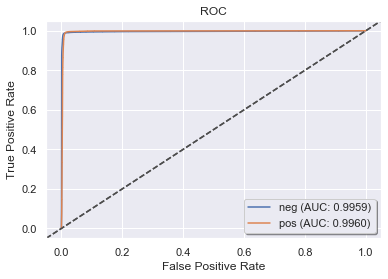

[[58109.   891.]
 [  437. 58563.]]


In [73]:
from collections import Counter
from imblearn.over_sampling import SMOTE
import weka.core.converters as converters
from weka.classifiers import Evaluation
from weka.core.classes import Random
from sklearn.model_selection import StratifiedKFold
from weka.classifiers import Classifier
import weka.core.jvm as jvm

jvm.stop()
jvm.start()
traindata.insert(0,'class', class_drop_train)
testdata.insert(0,'class', class_drop_test)
#conda install -c glemaitre imbalanced-learn

traindata_smote = traindata.drop(['class'], inplace = True, axis=1)
smote = SMOTE(random_state = 33)
X_smote, y_smote = smote.fit_sample(traindata,class_drop_train)   #y_train -to- class_drop_train
X_smote_train = pd.DataFrame(X_smote,columns=all_train_name[1:])
X_smote_train.insert(0,'class', y_smote)
#X_smote_train.replace({0:'neg',1:'pos'},inplace=True)

testdata_smote = testdata.drop(['class'], inplace = True, axis=1)
X_smote, y_smote = smote.fit_sample(testdata,class_drop_test)
X_smote_test = pd.DataFrame(X_smote,columns=all_train_name[1:])
X_smote_test.insert(0,'class', y_smote)
#X_smote_test.replace({0:'neg',1:'pos'},inplace=True)



X_smote_train.to_csv('/Users/liyifan/Desktop/551552/homework/homework4/Homework/weka_train_set_smote.csv',index = False)
X_smote_test.to_csv('/Users/liyifan/Desktop/551552/homework/homework4/Homework/weka_test_set_smote.csv',index = False)

weka_traindata_smote = converters.load_any_file("/Users/liyifan/Desktop/551552/homework/homework4/Homework/weka_train_set_smote.csv")
weka_testdata_smote = converters.load_any_file("/Users/liyifan/Desktop/551552/homework/homework4/Homework/weka_test_set_smote.csv")

weka_traindata_smote.class_is_first()
weka_testdata_smote.class_is_first()


cls_smote = Classifier(classname="weka.classifiers.trees.LMT")
eva_smote = Evaluation(weka_traindata_smote)
eva_smote.crossvalidate_model(classifier=cls_smote,data=weka_traindata_smote, num_folds = 5, rnd=Random(2))

print(eva_smote.percent_incorrect)
plcls.plot_roc(eva_smote, class_index=[0, 1], wait=True)
train_matrix = eva_smote.confusion_matrix
print(train_matrix)


the error is 1.125%

1.2576


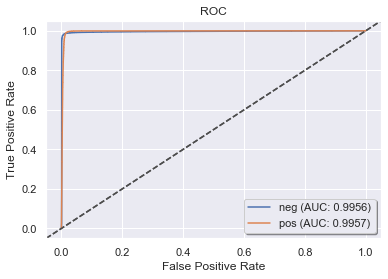

[[15373.   252.]
 [  141. 15484.]]


In [74]:
cls_smote1 = Classifier(classname="weka.classifiers.trees.LMT")
eva_smote1 = Evaluation(weka_testdata_smote)
eva_smote1.crossvalidate_model(classifier=cls_smote1,data=weka_testdata_smote, num_folds = 5, rnd=Random(2))

print(eva_smote1.percent_incorrect)
plcls.plot_roc(eva_smote1, class_index=[0, 1], wait=True)
test_matrix = eva_smote1.confusion_matrix
print(test_matrix)


the error is 1.2576%

6.8.3
(a) iv
when the s increase, the model will be more and more flexible, so the RSS of train data will be less and less。
(b) ii
when the s increase, at the beginning, the model will be more and more flexible, so the RSS of test data will be decrease. Then the s keep increase, the model will be overfit, so the RSS of test data will increase.
(c) iii
when the s increase, the model will be more and more flexible，so the variance will be higher and higher.
(d) iv
when the s increase, the model will be more and more flexible，so the bias will be less and less.
(e) v
irreducible error cannot be adjust, it is constant.

6.8.5
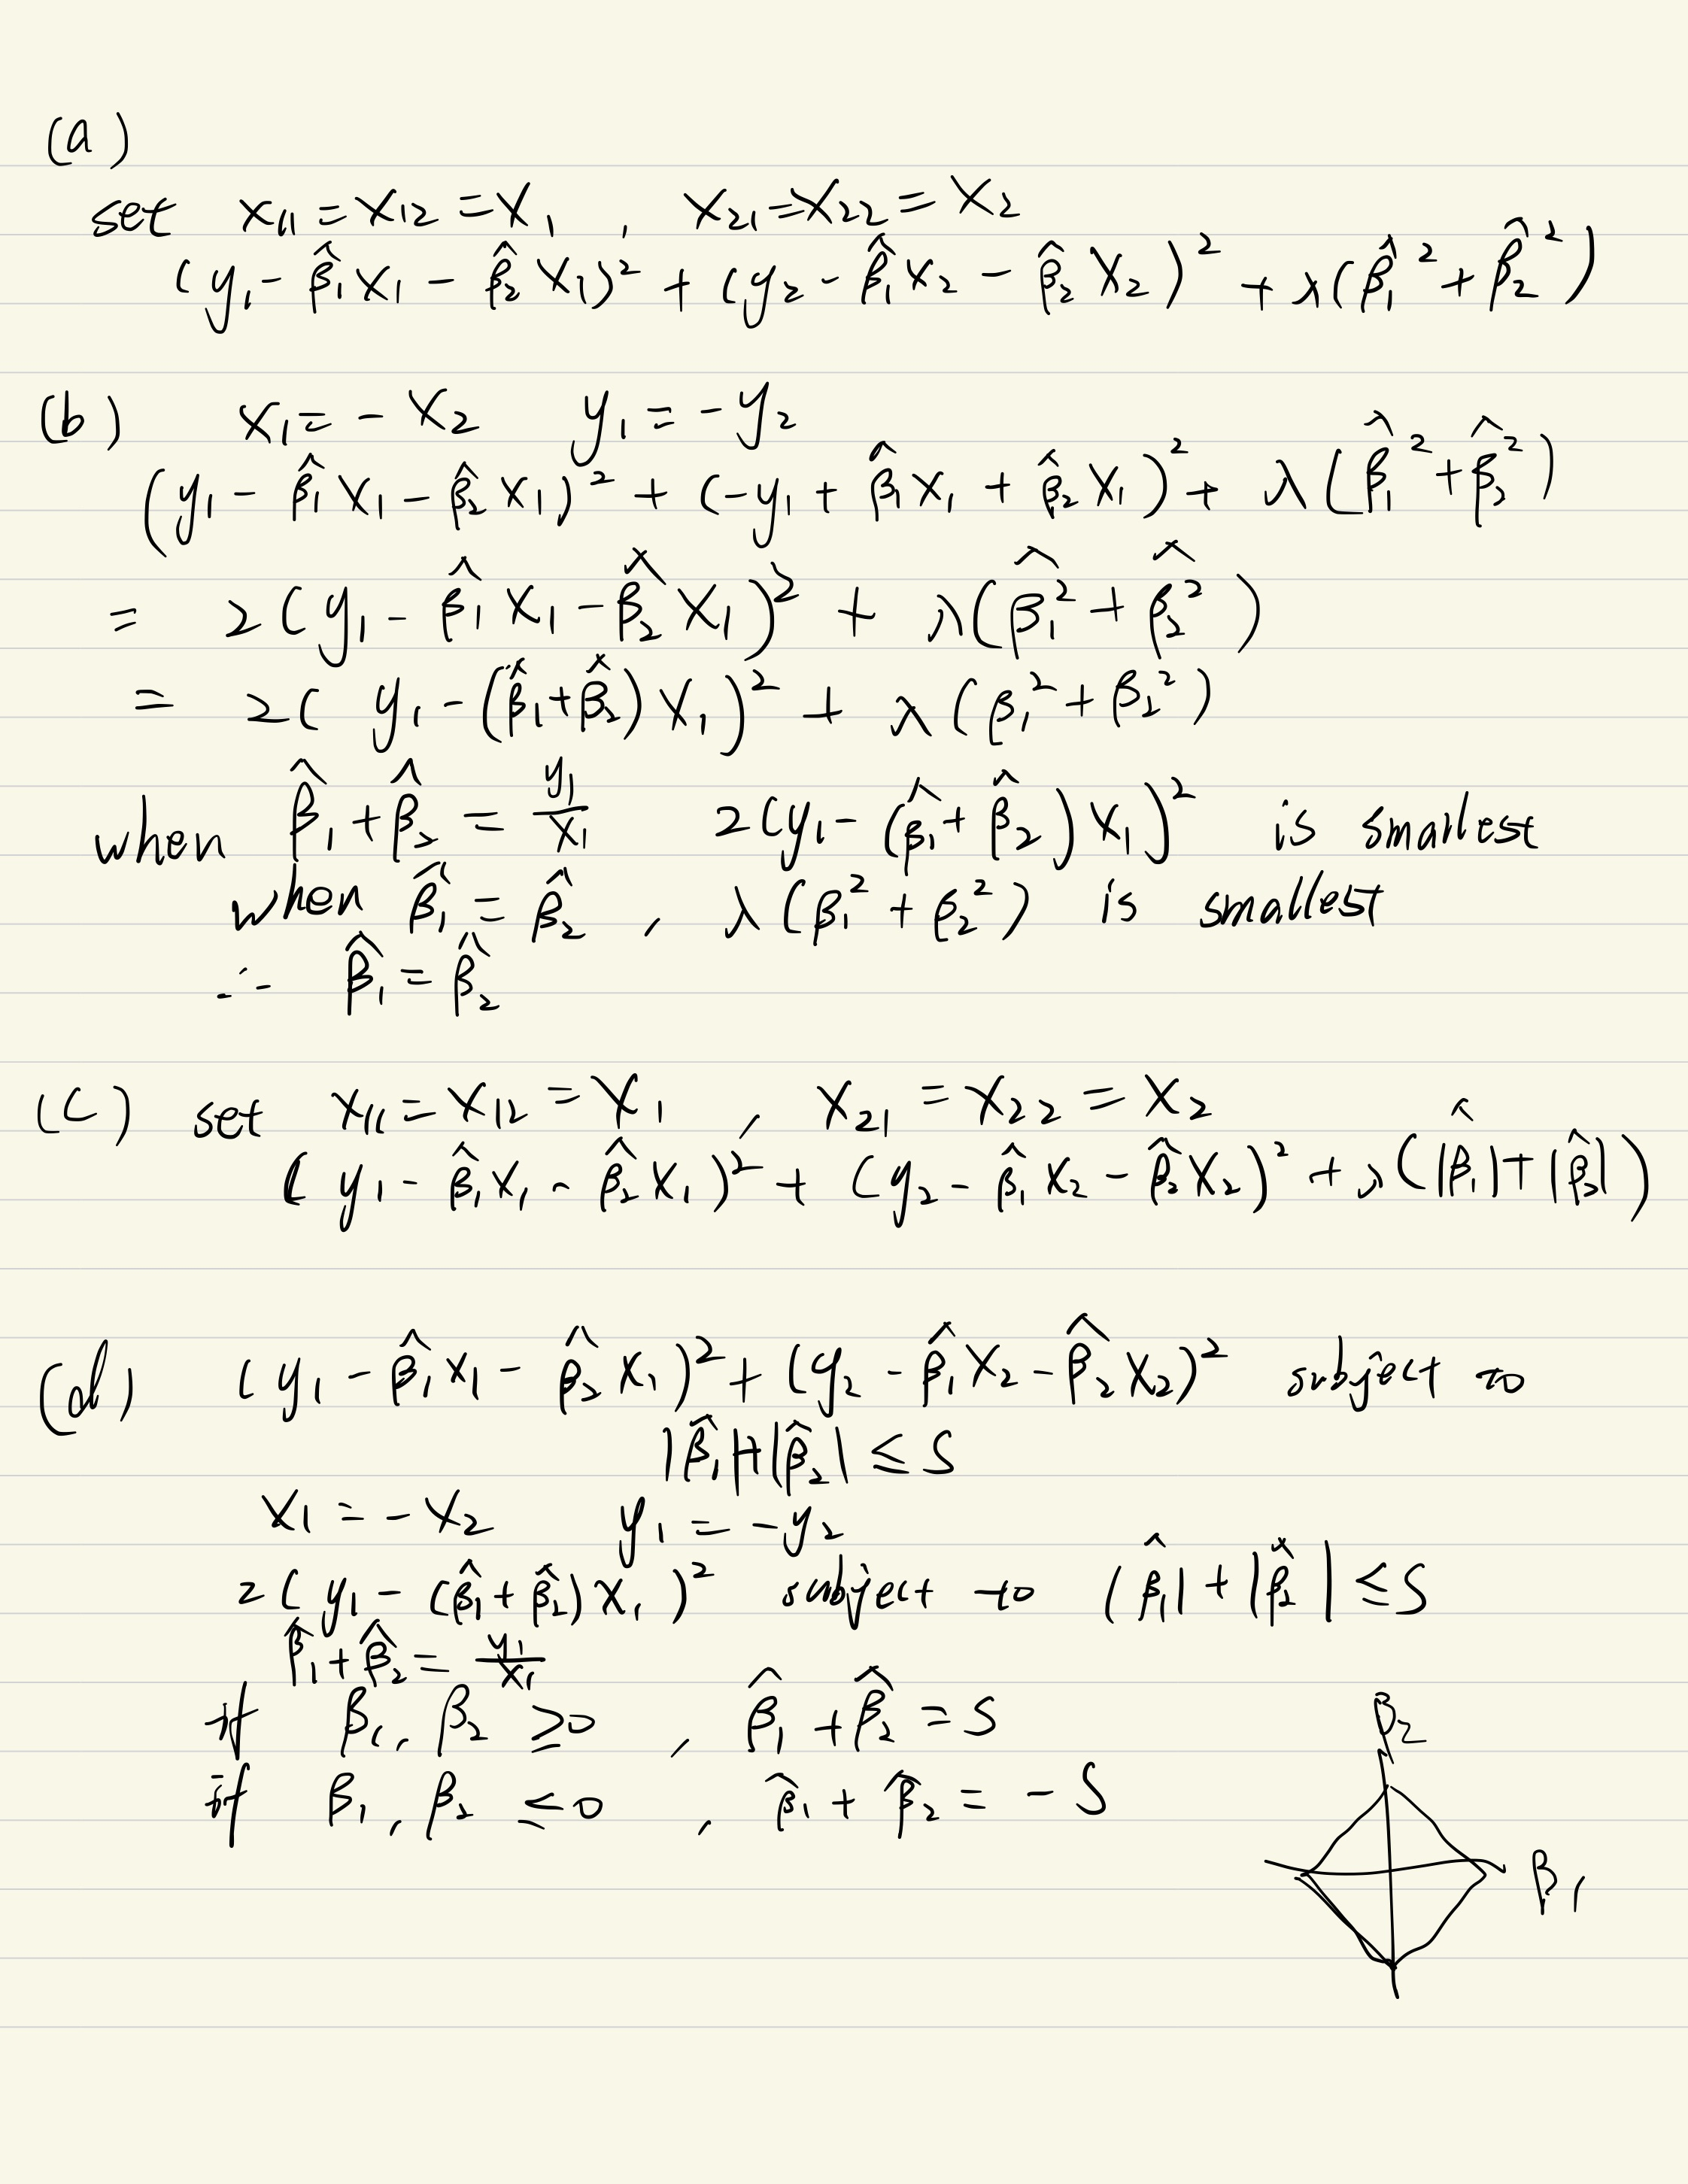

8.4.5 
majority vote: 6 red and 4 green, so the consequence is red
average probability: 45%, so the consequence is green

9.7.3
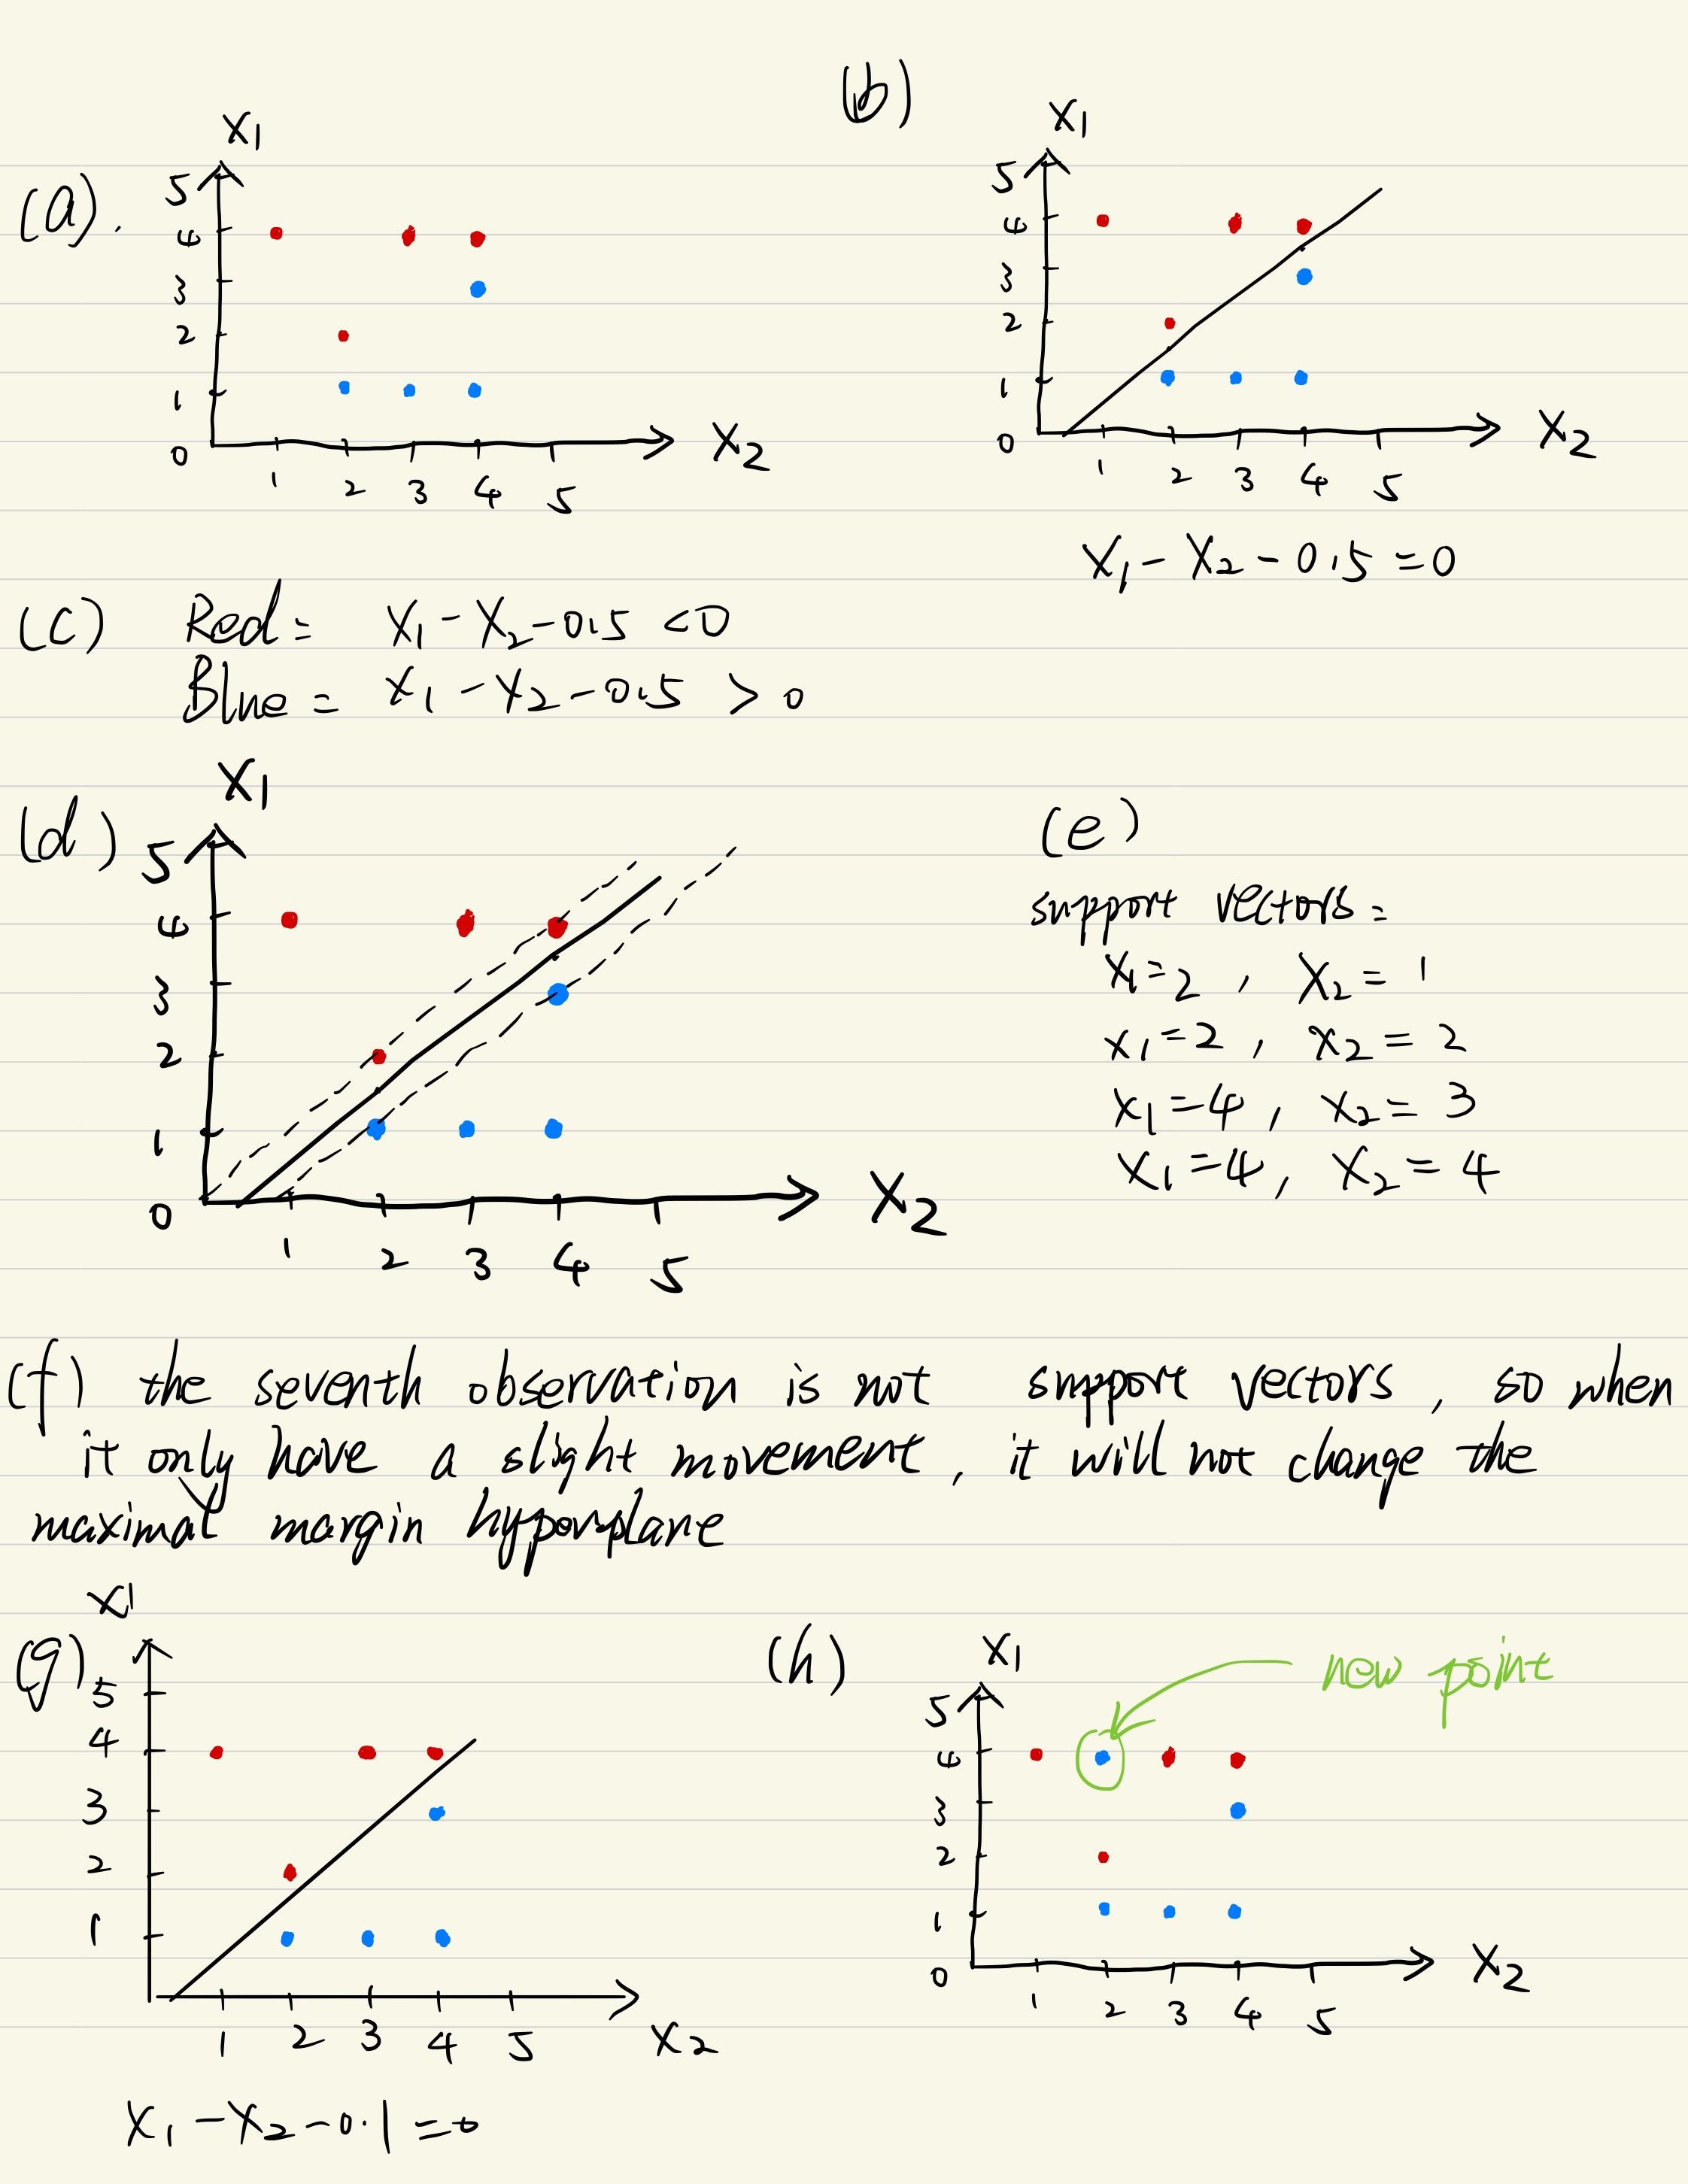